In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import scipy as sp
from pylab import text
from soccerplots.radar_chart import Radar

import highlight_text

In [277]:
Player_1 = 'Younes Belhanda 2017/2018'
Player_2 = 'Younes Belhanda 2018/2019'
Player_3 = 'Younes Belhanda 2019/2020'
Player_4 = 'Younes Belhanda 2020/2021'
Color_1 = 'white'
Color_2 = 'red'
Color_3 = 'yellow'
Color_4 = 'dodgerblue'

In [278]:
# the famous import font code to use Andale Mono
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [279]:
myfont = {'fontname':'DejaVu Sans'}
text_color = 'white'
background = '#313332'

In [280]:
df = pd.read_csv('Belhanda Galatasaray Stats2.csv')
df.columns = df.columns.str.replace(' ', '') 
Keep1 = pd.unique(df['Player'])
Keep1[:] = Keep1[::-1]
Keep1 = pd.DataFrame(Keep1, columns = ['Player'])
df = df.groupby('Season').sum().reset_index()
Keep2 = df[['Season','Minutes']]

In [281]:
df = df.iloc[:, 2:].divide(df.iloc[:,1], axis = 'rows')
df = df.iloc[:,:].multiply(90)
Keep2 = pd.concat([Keep1, Keep2], axis = 1)
df = pd.concat([Keep2, df], axis = 1)
df

,Player,Season,Minutes,TacklesSuccessful,TacklesUnsuccessful,TacklesTotal,Interceptions,FoulsWon,FoulsCommited,YellowCards,...,AerialsLost,PassesTotal,PassesSuccessfulLong,PassesUnsuccessfulLong,PassesSuccessfulShort,PassesUnsuccessfulShort,KeyPassesTotal,KeyPassesLong,KeyPassesShort,Assists
0,Younes Belhanda 2015/2016,2015/2016,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Younes Belhanda 2016/2017,2016/2017,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Younes Belhanda 2017/2018,2017/2018,2445,1.803681,1.582822,3.386503,1.067485,1.730061,1.840491,0.147239,...,0.588957,56.061350,1.987730,1.325153,42.993865,9.754601,2.981595,0.883436,2.098160,0.294479
3,Younes Belhanda 2018/2019,2018/2019,2363,1.713923,1.409226,3.123149,0.685569,1.599661,1.409226,0.342785,...,0.914092,51.646212,1.523487,1.066441,40.981803,8.074482,2.704190,0.647482,2.056708,0.228523
4,Younes Belhanda 2019/2020,2019/2020,2069,1.304978,0.826486,2.131464,0.608990,1.130981,1.435476,0.347994,...,0.826486,54.156597,1.739971,0.782987,44.630256,7.003383,1.522475,0.000000,1.522475,0.086999
5,Younes Belhanda 2020/2021,2020/2021,1411,1.403260,1.084337,2.487597,0.637845,1.084337,0.892984,0.191354,...,0.892984,49.688164,2.423813,0.701630,39.673990,6.888731,1.722183,0.255138,1.467045,0.191354


In [282]:
df['TackleSuccess%'] = 100*df['TacklesSuccessful'] / df['TacklesTotal']

df['AerialSuccess%'] = 100*df['AerialsWon'] / df['AerialsTotal']

df['BlocksTotal'] = df['BlockedShots'] + df['BlockedCrosses'] + df['BlockedPasses']

df['Tackles&Interceptions'] = df['TacklesSuccessful'] + df['Interceptions']

#df['DefensiveActionsSuccessful'] = df['TacklesSuccessful'] + df['Interceptions'] + df['Clearances'] + df['AerialsWon'] + df['BlocksTotal'] 

#df['DefensiveActionsUnsuccessful'] = df['TacklesUnsuccessful'] + df['FoulsCommited'] + df['AerialsLost']

df['DribbleSuccess%'] = 100*df['DribblesSuccessful'] / df['DribblesTotal']

df['Bookings'] = df['YellowCards'] + df['RedCards']

df['GoalContributions'] = df['Goals'] + df['Assists']

#df['PosessionLosses'] = df['Offsides'] + df['DribblesUnsuccessful'] + df['TouchesUnsuccessful'] + df['Dispossessed'] + df['PassesUnsuccessfulShort'] + df['PassesUnsuccessfulLong']

df['Turnovers'] = df['TouchesUnsuccessful'] + df['Dispossessed']

df['PassSuccessShort%'] = 100*df['PassesSuccessfulShort'] / (df['PassesSuccessfulShort'] + df['PassesUnsuccessfulShort'])

df['PassSuccessLong%'] = 100*df['PassesSuccessfulLong'] / (df['PassesSuccessfulLong'] + df['PassesUnsuccessfulLong'])

df['PassesSuccessful'] = df['PassesSuccessfulShort'] + df['PassesSuccessfulLong']

df['PassSuccess%'] = 100*(df['PassesSuccessfulShort'] + df['PassesSuccessfulLong']) / (df['PassesSuccessfulShort'] + df['PassesSuccessfulLong'] + df['PassesUnsuccessfulShort'] + df['PassesUnsuccessfulLong'])


,Player,Season,Minutes,TacklesSuccessful,TacklesUnsuccessful,TacklesTotal,Interceptions,FoulsWon,FoulsCommited,YellowCards,...,BlocksTotal,Tackles&Interceptions,DribbleSuccess%,Bookings,GoalContributions,Turnovers,PassSuccessShort%,PassSuccessLong%,PassesSuccessful,PassSuccess%
0,Younes Belhanda 2017/2018,2017/2018,2445,1.803681,1.582822,3.386503,1.067485,1.730061,1.840491,0.147239,...,1.104294,2.871166,70.833333,0.220859,0.404908,4.490798,81.507327,60.000000,44.981595,80.236376
1,Younes Belhanda 2018/2019,2018/2019,2363,1.713923,1.409226,3.123149,0.685569,1.599661,1.409226,0.342785,...,1.066441,2.399492,59.722222,0.380872,0.380872,3.580195,83.540373,58.823529,42.505290,82.300885
2,Younes Belhanda 2019/2020,2019/2020,2069,1.304978,0.826486,2.131464,0.608990,1.130981,1.435476,0.347994,...,0.652489,1.913968,66.666667,0.391493,0.304495,4.045433,86.436394,68.965517,46.370227,85.622490
3,Younes Belhanda 2020/2021,2020/2021,1411,1.403260,1.084337,2.487597,0.637845,1.084337,0.892984,0.191354,...,0.446492,2.041106,57.575758,0.191354,0.574061,3.125443,85.205479,77.551020,42.097803,84.724005


In [283]:
metrics1 = ['Goals','Assists','ShotsTotal', 'DribblesSuccessful', 'DribbleSuccess%','PassesSuccessful']

In [284]:
metrics2 = ['PassSuccess%','KeyPassesTotal', 'FoulsWon','Tackles&Interceptions','Turnovers','Bookings']

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Text(0.65, 0.03, '@msuatgunerli data via FBref, StatsBomb, Understat & WhoScored')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


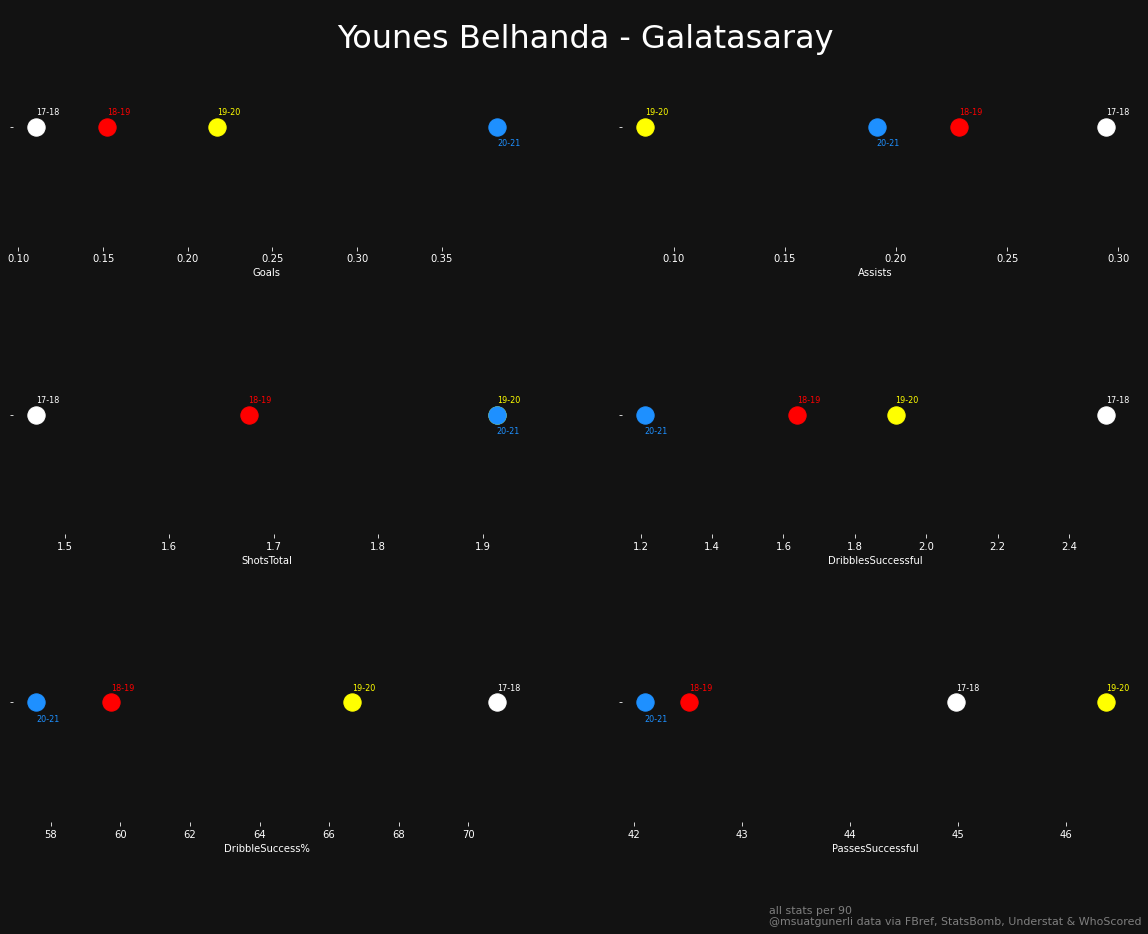

In [315]:
fig,axes = plt.subplots(3,2,figsize=(20,15))
fig.set_facecolor('#121212')
#ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

#create a list of comparisons, create counters to loop over
counter=0
counter2=0 #these two counters will specify which subplot to print in
met_counter = 0 #count over the metrics list to plot the next one

for i,ax in zip(df['Player'],axes.flatten()): #loop over the player column, zipim amacı ne?, 2D arrayi 1D'ye flatten et ki loop over yapabilesin
    ax.set_facecolor('#121212')
    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=2)

    spines = ['top','bottom','left','right']
    #spines = ['right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)

    sns.swarmplot(x=metrics1[met_counter],data=df,ax=axes[counter,counter2],zorder=2,color='#121212') #pass in the metrics and the met_counter

    ax.text(s='-95th',x=per_95,y=-0.4394,c='white',size=7)

    ax.set_xlabel(f'{metrics1[met_counter]}',c='white')      #fstring for axis labels

    for x in range(len(df['Player'])):
        if df['Player'][x] == Player_1:
            ax.scatter(x=df[metrics1[met_counter]][x],y=0,s=300,c='white',zorder=3, alpha = 1)
            ax.text(s= '17-18',x=df[metrics1[met_counter]][x],y=-.05,c='white',size=8)

        if df['Player'][x] == Player_2:
            ax.scatter(x=df[metrics1[met_counter]][x],y=0,s=300,c='red',zorder=3, alpha = 1)
            ax.text(s= '18-19',x=df[metrics1[met_counter]][x],y=-.05,c='red',size=8)

        if df['Player'][x] == Player_3:
            ax.scatter(x=df[metrics1[met_counter]][x],y=0,s=300,c='yellow',zorder=3, alpha = 1)
            ax.text(s= '19-20',x=df[metrics1[met_counter]][x],y=-.05,c='yellow',size=8)

        if df['Player'][x] == Player_4:
            ax.scatter(x=df[metrics1[met_counter]][x],y=0,s=300,c='dodgerblue',zorder=3, alpha = 1)
            ax.text(s= '20-21',x=df[metrics1[met_counter]][x],y=+.08,c='dodgerblue',size=8)

    met_counter+=1
    if counter2 == 0:
        counter2 = 1
        continue #break out of the current iteration and go to the top, yoksa bire set edip tekrar sıfıra dönecekti
    if counter2 == 1:
        counter2 = 0
        counter+=1

#s= str(Player_1) + ' for Galatasaray'
s= 'Younes Belhanda - Galatasaray'
highlight_text.fig_text(s=s,
                x=.35, y=.85,
                highlight_weights = ['bold'],
                **myfont,
                fontsize=32,
                #fontfamily = 'Andale Mono',
                color = text_color,
                highlight_colors = ['red'], #oyuncu adı rengi buraya
                va='center',
                zorder=3
               )

fig.text(.65,.04,"all stats per 90",fontsize=11, fontfamily='Andale Mono',color='#7F7F7F')
fig.text(.65,.03,"@msuatgunerli data via FBref, StatsBomb, Understat & WhoScored",fontsize=11, fontfamily='Andale Mono',color='#7F7F7F')

#plt.savefig('test.png',dpi=500,bbox_inches = 'tight',facecolor=background)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Text(0.65, 0.03, '@msuatgunerli data via FBref, StatsBomb, Understat & WhoScored')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


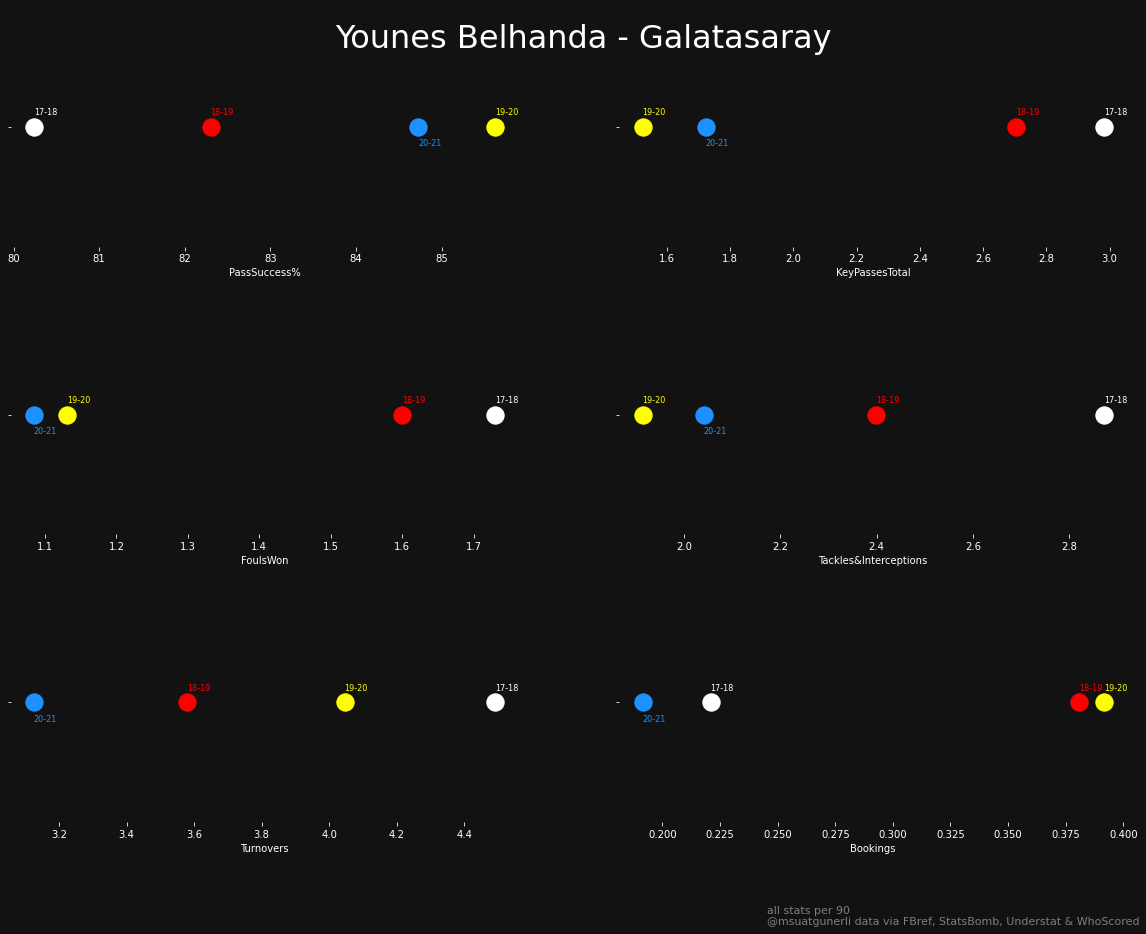

In [316]:
fig,axes = plt.subplots(3,2,figsize=(20,15))
fig.set_facecolor('#121212')
#ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

#create a list of comparisons, create counters to loop over
counter=0
counter2=0 #these two counters will specify which subplot to print in
met_counter = 0 #count over the metrics list to plot the next one

for i,ax in zip(df['Player'],axes.flatten()): #loop over the player column, zipim amacı ne?, 2D arrayi 1D'ye flatten et ki loop over yapabilesin
    ax.set_facecolor('#121212')
    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=2)

    spines = ['top','bottom','left','right']
    #spines = ['right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)

    sns.swarmplot(x=metrics2[met_counter],data=df,ax=axes[counter,counter2],zorder=2,color='#121212') #pass in the metrics and the met_counter

    ax.text(s='-95th',x=per_95,y=-0.4394,c='white',size=7)

    ax.set_xlabel(f'{metrics2[met_counter]}',c='white')      #fstring for axis labels

    for x in range(len(df['Player'])):
        if df['Player'][x] == Player_1:
            ax.scatter(x=df[metrics2[met_counter]][x],y=0,s=300,c='white',zorder=3, alpha = 1)
            ax.text(s= '17-18',x=df[metrics2[met_counter]][x],y=-.05,c='white',size=8)

        if df['Player'][x] == Player_2:
            ax.scatter(x=df[metrics2[met_counter]][x],y=0,s=300,c='red',zorder=3, alpha = 1)
            ax.text(s= '18-19',x=df[metrics2[met_counter]][x],y=-.05,c='red',size=8)

        if df['Player'][x] == Player_3:
            ax.scatter(x=df[metrics2[met_counter]][x],y=0,s=300,c='yellow',zorder=3, alpha = 1)
            ax.text(s= '19-20',x=df[metrics2[met_counter]][x],y=-.05,c='yellow',size=8)

        if df['Player'][x] == Player_4:
            ax.scatter(x=df[metrics2[met_counter]][x],y=0,s=300,c='dodgerblue',zorder=3, alpha = 1)
            ax.text(s= '20-21',x=df[metrics2[met_counter]][x],y=+.08,c='dodgerblue',size=8)

    met_counter+=1
    if counter2 == 0:
        counter2 = 1
        continue #break out of the current iteration and go to the top, yoksa bire set edip tekrar sıfıra dönecekti
    if counter2 == 1:
        counter2 = 0
        counter+=1

#s= str(Player_1) + ' for Galatasaray'
s= 'Younes Belhanda - Galatasaray'
highlight_text.fig_text(s=s,
                x=.35, y=.85,
                highlight_weights = ['bold'],
                **myfont,
                fontsize=32,
                #fontfamily = 'Andale Mono',
                color = text_color,
                highlight_colors = ['red'], #oyuncu adı rengi buraya
                va='center',
                zorder=3
               )

fig.text(.65,.04,"all stats per 90",fontsize=11, fontfamily='Andale Mono',color='#7F7F7F')
fig.text(.65,.03,"@msuatgunerli data via FBref, StatsBomb, Understat & WhoScored",fontsize=11, fontfamily='Andale Mono',color='#7F7F7F')

#plt.savefig('test.png',dpi=500,bbox_inches = 'tight',facecolor=background)
